In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import yfinance as yf

In [2]:
# !pip install numpy pandas matplotlib pandas_datareader yfinance
# !pip install scikit-learn

In [3]:
import yfinance as yf
from datetime import datetime, timedelta
import pandas as pd

symbol = 'COST'

# Calculate dynamic start date (5 years ago from today)
end_date = datetime.today()
start_date = end_date - timedelta(days=5*365)

# Download data with yfinance
df = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

# Rename columns to match your original format
df = df.rename(columns={
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Volume': 'volume'
})

# Set index name to 'Date'
df.index.name = 'Date'

# Optional: convert all columns to numeric (usually already numeric)
df = df.apply(pd.to_numeric)

df

C:\Users\Nicholas Tam\AppData\Local\Temp\ipykernel_20876\1887781700.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))
[*********************100%***********************]  1 of 1 completed


Price,close,high,low,open,volume
Ticker,COST,COST,COST,COST,COST
Date,,,,,
2020-06-09,281.366821,284.175442,281.016921,283.162497,3155800
2020-06-10,283.005981,284.203108,281.458954,282.223278,2713700
2020-06-11,277.020355,284.727923,276.845419,282.692816,3443000
2020-06-12,275.058899,280.998386,272.802797,278.714688,4020000
2020-06-15,273.659302,274.478875,270.583654,273.539586,3266800
...,...,...,...,...,...
2025-06-02,1056.849976,1060.500000,1034.270020,1034.270020,2148000
2025-06-03,1055.589966,1067.079956,1043.260010,1054.150024,1992900


In [4]:
df.columns = df.columns.droplevel(1)
df.head()

Price,close,high,low,open,volume
Date,,,,,
2020-06-09,281.366821,284.175442,281.016921,283.162497,3155800
2020-06-10,283.005981,284.203108,281.458954,282.223278,2713700
2020-06-11,277.020355,284.727923,276.845419,282.692816,3443000
2020-06-12,275.058899,280.998386,272.802797,278.714688,4020000
2020-06-15,273.659302,274.478875,270.583654,273.539586,3266800


In [5]:
# Drop 'Price' only if it exists
df = df.drop(columns=['Price'], errors='ignore')

# Reset index to turn Date index into a regular integer index
df = df.reset_index(drop=True)

print(df.head())

Price       close        high         low        open   volume
0      281.366821  284.175442  281.016921  283.162497  3155800
1      283.005981  284.203108  281.458954  282.223278  2713700
2      277.020355  284.727923  276.845419  282.692816  3443000
3      275.058899  280.998386  272.802797  278.714688  4020000
4      273.659302  274.478875  270.583654  273.539586  3266800


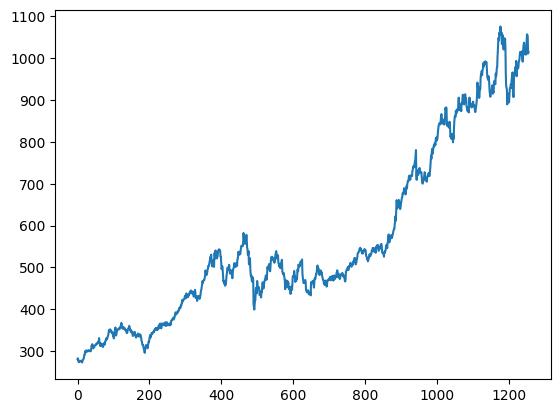

In [6]:
plt.plot(df.close)

In [7]:
ma100 = df.close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1251    982.467245
1252    983.831589
1253    985.097078
1254    985.858298
1255    986.782922
Name: close, Length: 1256, dtype: float64

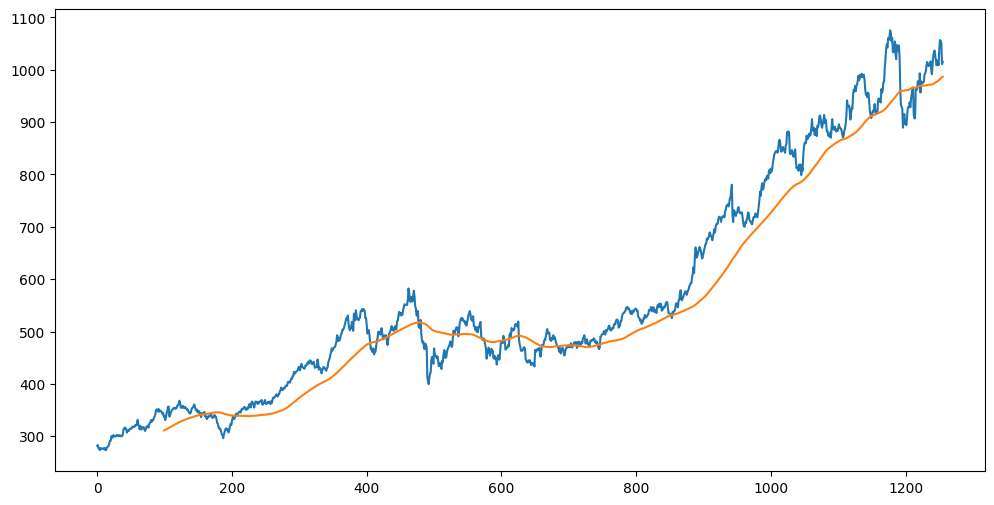

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100)

In [9]:
ma200 = df.close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1251    947.596998
1252    948.577476
1253    949.465526
1254    950.182851
1255    950.912058
Name: close, Length: 1256, dtype: float64

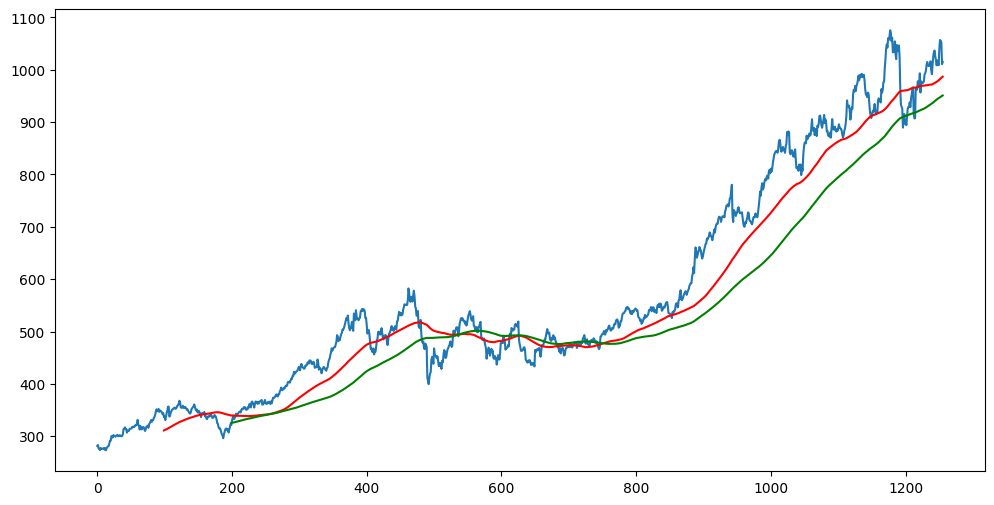

In [10]:
plt.figure(figsize = (12,6))
plt.plot(df.close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [11]:
df.shape

(1256, 5)

In [12]:
# Splitting Data into Training and Testing

from sklearn.model_selection import train_test_split

train, test = train_test_split(df[['close']], test_size=0.30, shuffle=False)

print(train.shape)
print(test.shape)


(879, 1)
(377, 1)


In [13]:
train.head()

Price,close
0,281.366821
1,283.005981
2,277.020355
3,275.058899
4,273.659302


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_training_array = scaler.fit_transform(train)
data_training_array

array([[0.02677989],
       [0.0320824 ],
       [0.01271953],
       [0.00637442],
       [0.00184688],
       [0.01429828],
       [0.0090855 ],
       [0.00896645],
       [0.00994922],
       [0.01158749],
       [0.01409007],
       [0.00434916],
       [0.0118259 ],
       [0.        ],
       [0.0149836 ],
       [0.01980919],
       [0.02439666],
       [0.02734556],
       [0.04447427],
       [0.05859406],
       [0.05886219],
       [0.0863272 ],
       [0.08838277],
       [0.0785226 ],
       [0.09365537],
       [0.08978284],
       [0.08850183],
       [0.08409304],
       [0.08921667],
       [0.0928808 ],
       [0.0945488 ],
       [0.08802511],
       [0.08704243],
       [0.09246361],
       [0.09237456],
       [0.08811445],
       [0.08626353],
       [0.08838307],
       [0.0996975 ],
       [0.1309533 ],
       [0.13149055],
       [0.14146128],
       [0.13429669],
       [0.13158009],
       [0.10898163],
       [0.12190778],
       [0.11874347],
       [0.120

In [16]:
x_train = []
y_train = []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [17]:
# ML Model

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [19]:
model = Sequential()

model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))  # Output shape will be (None, 30)


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [21]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
25/25 [==============================] - 8s 161ms/step - loss: 0.1471
Epoch 2/50
25/25 [==============================] - 4s 160ms/step - loss: 0.0255
Epoch 3/50
25/25 [==============================] - 4s 174ms/step - loss: 0.0216
Epoch 4/50
25/25 [==============================] - 4s 175ms/step - loss: 0.0197
Epoch 5/50
25/25 [==============================] - 5s 180ms/step - loss: 0.0197
Epoch 6/50
25/25 [==============================] - 4s 174ms/step - loss: 0.0175
Epoch 7/50
25/25 [==============================] - 4s 173ms/step - loss: 0.0163
Epoch 8/50
25/25 [==============================] - 5s 200ms/step - loss: 0.0164
Epoch 9/50
25/25 [==============================] - 5s 202ms/step - loss: 0.0142
Epoch 10/50
25/25 [==============================] - 4s 176ms/step - loss: 0.0141
Epoch 11/50
25/25 [==============================] - 5s 205ms/step - loss: 0.0123
Epoch 12/50
25/25 [==============================] - 4s 167ms/step - loss: 0.0124
Epoch 13/50
25/25 [======

In [22]:
model.save('keras_model.h5')

C:\Users\Nicholas Tam\Projects\SimpleStockPredictor\tf_env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
test.head()

Price,close
879,587.039124
880,589.056274
881,592.469788
882,592.304871
883,604.989319


In [24]:
past_100_days = train.tail(100)

In [25]:
final_df = pd.concat([past_100_days, test], ignore_index=True)

In [26]:
final_df

Price,close
0,528.194031
1,534.242065
2,534.850952
3,535.353149
4,538.106628
...,...
472,1056.849976
473,1055.589966
474,1051.689941
475,1010.809998


In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02409487],
       [0.03487998],
       [0.03596577],
       [0.03686131],
       [0.04177143],
       [0.04332219],
       [0.05378001],
       [0.05595094],
       [0.05763906],
       [0.05016205],
       [0.05272916],
       [0.04816341],
       [0.03920454],
       [0.03382891],
       [0.0430293 ],
       [0.03329516],
       [0.04426975],
       [0.04032429],
       [0.04649238],
       [0.04957627],
       [0.05210888],
       [0.04954198],
       [0.04444194],
       [0.04537242],
       [0.02480125],
       [0.02106258],
       [0.0180822 ],
       [0.00974329],
       [0.01403323],
       [0.        ],
       [0.00396995],
       [0.00773279],
       [0.01909094],
       [0.01821064],
       [0.03032817],
       [0.02164542],
       [0.02247402],
       [0.02585733],
       [0.02918872],
       [0.03362483],
       [0.04672628],
       [0.04674337],
       [0.04841799],
       [0.0570659 ],
       [0.04254888],
       [0.05352707],
       [0.0563407 ],
       [0.055

In [28]:
input_data.shape

(477, 1)

In [29]:
x_test =[]
y_test =[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    

In [30]:
x_test,y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(377, 100, 1)
(377,)


In [31]:
# Making Predictions

y_predicted = model.predict(x_test)

12/12 [==============================] - 1s 66ms/step


In [32]:
y_predicted.shape

(377, 1)

In [33]:
y_test

array([0.12902988, 0.13262695, 0.13871407, 0.13841998, 0.16103942,
       0.17079261, 0.19240875, 0.1730061 , 0.2214957 , 0.26026662,
       0.25421411, 0.22526561, 0.2324593 , 0.24359607, 0.24881867,
       0.2615173 , 0.25497338, 0.24963236, 0.23295398, 0.22241323,
       0.22888629, 0.24243399, 0.25247974, 0.2621895 , 0.27205839,
       0.2735088 , 0.2905937 , 0.28749849, 0.29227397, 0.29779186,
       0.31133955, 0.30698876, 0.29828719, 0.29637704, 0.28468649,
       0.29703139, 0.30964175, 0.32154454, 0.31118043, 0.32999077,
       0.33884701, 0.3418226 , 0.34116727, 0.35709062, 0.36484844,
       0.36350263, 0.36174888, 0.34729564, 0.36134149, 0.36546861,
       0.3645475 , 0.36755857, 0.36282945, 0.38298593, 0.38923827,
       0.40238075, 0.4012474 , 0.40700386, 0.39979492, 0.40962517,
       0.42687692, 0.42824091, 0.45178037, 0.47365512, 0.36732848,
       0.34699458, 0.38737863, 0.38263177, 0.37864647, 0.36745223,
       0.37792028, 0.37903612, 0.39418006, 0.39743918, 0.38369

In [34]:
y_predicted

array([[0.19110933],
       [0.19112006],
       [0.19098459],
       [0.19073193],
       [0.19038461],
       [0.18997076],
       [0.18951915],
       [0.18908139],
       [0.18868554],
       [0.18841863],
       [0.18853869],
       [0.18926264],
       [0.19064736],
       [0.1926357 ],
       [0.19517042],
       [0.1984587 ],
       [0.2025294 ],
       [0.207349  ],
       [0.21278973],
       [0.2186631 ],
       [0.22462736],
       [0.2301996 ],
       [0.23511782],
       [0.23931088],
       [0.24279071],
       [0.24566478],
       [0.24806929],
       [0.25019264],
       [0.25221643],
       [0.254318  ],
       [0.2566748 ],
       [0.25949487],
       [0.26291496],
       [0.26694584],
       [0.27147782],
       [0.27626988],
       [0.28112218],
       [0.28594846],
       [0.29078674],
       [0.29563516],
       [0.3004639 ],
       [0.3053249 ],
       [0.31028798],
       [0.31539357],
       [0.32074332],
       [0.3264847 ],
       [0.33268505],
       [0.339

In [35]:
scaler.scale_

array([0.00178324])

In [36]:
scale_factor = 1 / scaler.scale_[0]
y_predicted = y_predicted *scale_factor
y_test = y_test * scale_factor

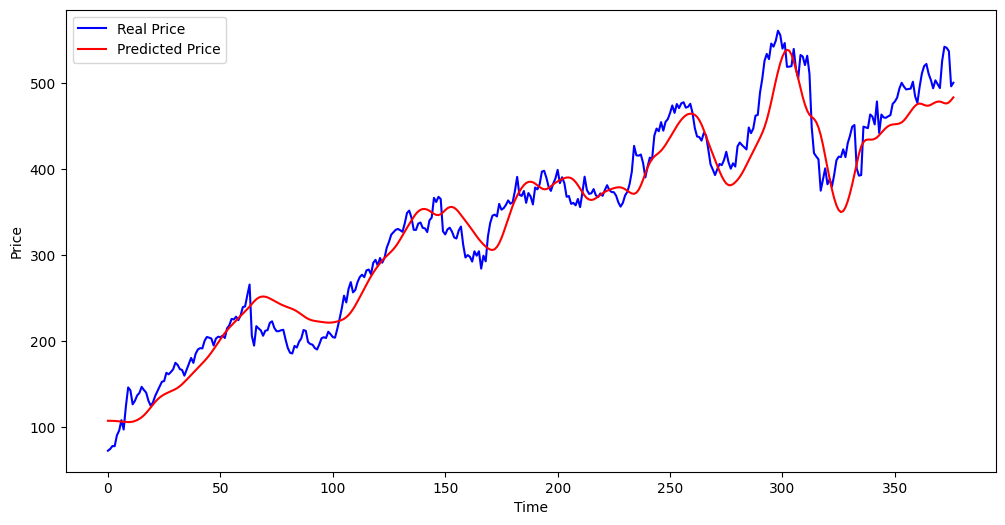

In [37]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = 'Real Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()